In [1]:
# Importing required packages

import pandas as pd
import numpy as np

import operator
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, metrics, ensemble, tree, model_selection

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
# Reading CSVs

train_df = pd.read_csv('Challenge Data/Train.csv')
test_df = pd.read_csv('Challenge Data/Test.csv')
test_id = test_df['Client ID']

In [3]:
train_df.head()

,Client ID,Company ID,Client Contract Starting Month,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Flag 6,Activity 1 Time Period 11,Activity 1 Time Period 10,Activity 1 Time Period 9,Activity 1 Time Period 8,Activity 1 Time Period 7,Activity 1 Time Period 6,Activity 1 Time Period 5,Activity 1 Time Period 4,Activity 1 Time Period 3,Activity 1 Time Period 2,Activity 1 Time Period 1,Activity 1 Time Period 0,Activity 2 Time Period 11,Activity 2 Time Period 10,Activity 2 Time Period 9,Activity 2 Time Period 8,Activity 2 Time Period 7,Activity 2 Time Period 6,Activity 2 Time Period 5,Activity 2 Time Period 4,Activity 2 Time Period 3,Activity 2 Time Period 2,Activity 2 Time Period 1,Activity 2 Time Period 0,Activity 3 Time Period 11,Activity 3 Time Period 10,Activity 3 Time Period 9,Activity 3 Time Period 8,Activity 3 Time Period 7,Activity 3 Time Period 6,Activity 3 Time Period 5,Activity 3 Time Period 4,Activity 3 Time Period 3,Activity 3 Time Period 2,Activity 3 Time Period 1,Activity 3 Time Period 0,Activity 4 Time Period 11,Activity 4 Time Period 10,Activity 4 Time Period 9,Activity 4 Time Period 8,Activity 4 Time Period 7,Activity 4 Time Period 6,Activity 4 Time Period 5,Activity 4 Time Period 4,Activity 4 Time Period 3,Activity 4 Time Period 2,Activity 4 Time Period 1,Activity 4 Time Period 0,Activity 5 Time Period 11,Activity 5 Time Period 10,Activity 5 Time Period 9,Activity 5 Time Period 8,Activity 5 Time Period 7,Activity 5 Time Period 6,Activity 5 Time Period 5,Activity 5 Time Period 4,Activity 5 Time Period 3,Activity 5 Time Period 2,Activity 5 Time Period 1,Activity 5 Time Period 0,Activity 6 Time Period 11,Activity 6 Time Period 10,Activity 6 Time Period 9,Activity 6 Time Period 8,Activity 6 Time Period 7,Activity 6 Time Period 6,Activity 6 Time Period 5,Activity 6 Time Period 4,Activity 6 Time Period 3,Activity 6 Time Period 2,Activity 6 Time Period 1,Activity 6 Time Period 0,Activity 7 Time Period 11,Activity 7 Time Period 10,Activity 7 Time Period 9,Activity 7 Time Period 8,Activity 7 Time Period 7,Activity 7 Time Period 6,Activity 7 Time Period 5,Activity 7 Time Period 4,Activity 7 Time Period 3,Activity 7 Time Period 2,Activity 7 Time Period 1,Activity 7 Time Period 0,Activity 8 Time Period 11,Activity 8 Time Period 10,Activity 8 Time Period 9,Activity 8 Time Period 8,Activity 8 Time Period 7,Activity 8 Time Period 6,Activity 8 Time Period 5,Activity 8 Time Period 4,Activity 8 Time Period 3,Activity 8 Time Period 2,Activity 8 Time Period 1,Activity 8 Time Period 0,Client Retention Flag
0,10004519380,6294937,Jun,Multi Year,2,Yes,Unknown,8,Manufacturing,24,16,20,52,0,14,94,44,16,22,10,40,2,0,0,0,0,1,27,13,4,0,0,3,0,2,1,1,1,1,2,0,1,0,1,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,Yes
1,10004521476,6293796,Mar,Multi Year,7,No,Yes,6,Government,9,2,0,18,27,0,26,2,6,6,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No
2,10004515403,6293911,Dec,Multi Year,2,No,Unknown,15,Technology and Telecom,1,11,12,0,11,13,5,6,11,38,4,1,0,1,0,2,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes
3,10004511478,6293048,Feb,Multi Year,2,No,Unknown,15,Technology and Telecom,1,0,0,0,2,0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,No
4,10004516858,6294364,Jun,Multi Year,7,No,Unknown,9,"Banking, Finance & Ins",16,14,48,6,6,0,8,18,12,34,40,12,9,0,0,0,0,0,0,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes


In [4]:
print("Train Data : ", train_df.shape)
print("Test Data : ", test_df.shape)

Train Data :  (8766, 106)
Test Data :  (3756, 105)


In [5]:
# Replacing spaces with _ in column names

train_df.columns = train_df.columns.str.strip().str.replace(' ', '_')
test_df.columns = test_df.columns.str.strip().str.replace(' ', '_')

In [6]:
train_df.head()

,Client_ID,Company_ID,Client_Contract_Starting_Month,Flag_1,Flag_2,Flag_3,Flag_4,Flag_5,Flag_6,Activity_1_Time_Period_11,Activity_1_Time_Period_10,Activity_1_Time_Period_9,Activity_1_Time_Period_8,Activity_1_Time_Period_7,Activity_1_Time_Period_6,Activity_1_Time_Period_5,Activity_1_Time_Period_4,Activity_1_Time_Period_3,Activity_1_Time_Period_2,Activity_1_Time_Period_1,Activity_1_Time_Period_0,Activity_2_Time_Period_11,Activity_2_Time_Period_10,Activity_2_Time_Period_9,Activity_2_Time_Period_8,Activity_2_Time_Period_7,Activity_2_Time_Period_6,Activity_2_Time_Period_5,Activity_2_Time_Period_4,Activity_2_Time_Period_3,Activity_2_Time_Period_2,Activity_2_Time_Period_1,Activity_2_Time_Period_0,Activity_3_Time_Period_11,Activity_3_Time_Period_10,Activity_3_Time_Period_9,Activity_3_Time_Period_8,Activity_3_Time_Period_7,Activity_3_Time_Period_6,Activity_3_Time_Period_5,Activity_3_Time_Period_4,Activity_3_Time_Period_3,Activity_3_Time_Period_2,Activity_3_Time_Period_1,Activity_3_Time_Period_0,Activity_4_Time_Period_11,Activity_4_Time_Period_10,Activity_4_Time_Period_9,Activity_4_Time_Period_8,Activity_4_Time_Period_7,Activity_4_Time_Period_6,Activity_4_Time_Period_5,Activity_4_Time_Period_4,Activity_4_Time_Period_3,Activity_4_Time_Period_2,Activity_4_Time_Period_1,Activity_4_Time_Period_0,Activity_5_Time_Period__11,Activity_5_Time_Period__10,Activity_5_Time_Period__9,Activity_5_Time_Period__8,Activity_5_Time_Period__7,Activity_5_Time_Period__6,Activity_5_Time_Period__5,Activity_5_Time_Period__4,Activity_5_Time_Period__3,Activity_5_Time_Period__2,Activity_5_Time_Period__1,Activity_5_Time_Period__0,Activity_6_Time_Period__11,Activity_6_Time_Period__10,Activity_6_Time_Period__9,Activity_6_Time_Period__8,Activity_6_Time_Period__7,Activity_6_Time_Period__6,Activity_6_Time_Period__5,Activity_6_Time_Period__4,Activity_6_Time_Period__3,Activity_6_Time_Period__2,Activity_6_Time_Period__1,Activity_6_Time_Period__0,Activity_7_Time_Period__11,Activity_7_Time_Period__10,Activity_7_Time_Period__9,Activity_7_Time_Period__8,Activity_7_Time_Period__7,Activity_7_Time_Period__6,Activity_7_Time_Period__5,Activity_7_Time_Period__4,Activity_7_Time_Period__3,Activity_7_Time_Period__2,Activity_7_Time_Period__1,Activity_7_Time_Period__0,Activity_8_Time_Period_11,Activity_8_Time_Period_10,Activity_8_Time_Period_9,Activity_8_Time_Period_8,Activity_8_Time_Period_7,Activity_8_Time_Period_6,Activity_8_Time_Period_5,Activity_8_Time_Period_4,Activity_8_Time_Period_3,Activity_8_Time_Period_2,Activity_8_Time_Period_1,Activity_8_Time_Period_0,Client_Retention_Flag
0,10004519380,6294937,Jun,Multi Year,2,Yes,Unknown,8,Manufacturing,24,16,20,52,0,14,94,44,16,22,10,40,2,0,0,0,0,1,27,13,4,0,0,3,0,2,1,1,1,1,2,0,1,0,1,1,1,0,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,Yes
1,10004521476,6293796,Mar,Multi Year,7,No,Yes,6,Government,9,2,0,18,27,0,26,2,6,6,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No
2,10004515403,6293911,Dec,Multi Year,2,No,Unknown,15,Technology and Telecom,1,11,12,0,11,13,5,6,11,38,4,1,0,1,0,2,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes
3,10004511478,6293048,Feb,Multi Year,2,No,Unknown,15,Technology and Telecom,1,0,0,0,2,0,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,No
4,10004516858,6294364,Jun,Multi Year,7,No,Unknown,9,"Banking, Finance & Ins",16,14,48,6,6,0,8,18,12,34,40,12,9,0,0,0,0,0,0,1,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes


In [7]:
# One Hot Encoding Client_Contract_Starting_Month

train_df_dummies = pd.get_dummies(train_df['Client_Contract_Starting_Month'], prefix='Month', drop_first=True)
train_df = pd.concat([train_df, train_df_dummies], axis=1)
train_df.drop(['Client_Contract_Starting_Month'], axis=1, inplace=True)

test_df_dummies = pd.get_dummies(test_df['Client_Contract_Starting_Month'], prefix='Month', drop_first=True)
test_df = pd.concat([test_df, test_df_dummies], axis=1)
test_df.drop(['Client_Contract_Starting_Month'], axis=1, inplace=True)

### Feature Enginnering

In [8]:
# Total Activity counts over all time periods

activity_1 = ["Activity_1_Time_Period_"+str(i) for i in range(0,12)]
activity_2 = ["Activity_2_Time_Period_"+str(i) for i in range(0,12)]
activity_3 = ["Activity_3_Time_Period_"+str(i) for i in range(0,12)]
activity_4 = ["Activity_4_Time_Period_"+str(i) for i in range(0,12)]
activity_5 = ["Activity_5_Time_Period__"+str(i) for i in range(0,12)]
activity_6 = ["Activity_6_Time_Period__"+str(i) for i in range(0,12)]
activity_7 = ["Activity_7_Time_Period__"+str(i) for i in range(0,12)]
activity_8 = ["Activity_8_Time_Period_"+str(i) for i in range(0,12)]

train_df['Activity_1_Total'] = train_df[activity_1].sum(axis=1)
train_df['Activity_2_Total'] = train_df[activity_2].sum(axis=1)
train_df['Activity_3_Total'] = train_df[activity_3].sum(axis=1)
train_df['Activity_4_Total'] = train_df[activity_4].sum(axis=1)
train_df['Activity_5_Total'] = train_df[activity_5].sum(axis=1)
train_df['Activity_6_Total'] = train_df[activity_6].sum(axis=1)
train_df['Activity_7_Total'] = train_df[activity_7].sum(axis=1)
train_df['Activity_8_Total'] = train_df[activity_8].sum(axis=1)

test_df['Activity_1_Total'] = test_df[activity_1].sum(axis=1)
test_df['Activity_2_Total'] = test_df[activity_2].sum(axis=1)
test_df['Activity_3_Total'] = test_df[activity_3].sum(axis=1)
test_df['Activity_4_Total'] = test_df[activity_4].sum(axis=1)
test_df['Activity_5_Total'] = test_df[activity_5].sum(axis=1)
test_df['Activity_6_Total'] = test_df[activity_6].sum(axis=1)
test_df['Activity_7_Total'] = test_df[activity_7].sum(axis=1)
test_df['Activity_8_Total'] = test_df[activity_8].sum(axis=1)

In [9]:
# Total Activity counts for the last 6 months

activity_1_last_half=["Activity_1_Time_Period_"+str(i) for i in range(6,12)]
activity_2_last_half=["Activity_2_Time_Period_"+str(i) for i in range(6,12)]
activity_3_last_half=["Activity_3_Time_Period_"+str(i) for i in range(6,12)]
activity_4_last_half=["Activity_4_Time_Period_"+str(i) for i in range(6,12)]
activity_5_last_half=["Activity_5_Time_Period__"+str(i) for i in range(6,12)]
activity_6_last_half=["Activity_6_Time_Period__"+str(i) for i in range(6,12)]
activity_7_last_half=["Activity_7_Time_Period__"+str(i) for i in range(6,12)]
activity_8_last_half=["Activity_8_Time_Period_"+str(i) for i in range(6,12)]

train_df['Activity_1__last_half'] = train_df[activity_1_last_half].sum(axis=1)
train_df['Activity_2__last_half'] = train_df[activity_2_last_half].sum(axis=1)
train_df['Activity_3__last_half'] = train_df[activity_3_last_half].sum(axis=1)
train_df['Activity_4__last_half'] = train_df[activity_4_last_half].sum(axis=1)
train_df['Activity_5__last_half'] = train_df[activity_5_last_half].sum(axis=1)
train_df['Activity_6__last_half'] = train_df[activity_6_last_half].sum(axis=1)
train_df['Activity_7__last_half'] = train_df[activity_7_last_half].sum(axis=1)
train_df['Activity_8__last_half'] = train_df[activity_8_last_half].sum(axis=1)

test_df['Activity_1__last_half'] = test_df[activity_1_last_half].sum(axis=1)
test_df['Activity_2__last_half'] = test_df[activity_2_last_half].sum(axis=1)
test_df['Activity_3__last_half'] = test_df[activity_3_last_half].sum(axis=1)
test_df['Activity_4__last_half'] = test_df[activity_4_last_half].sum(axis=1)
test_df['Activity_5__last_half'] = test_df[activity_5_last_half].sum(axis=1)
test_df['Activity_6__last_half'] = test_df[activity_6_last_half].sum(axis=1)
test_df['Activity_7__last_half'] = test_df[activity_7_last_half].sum(axis=1)
test_df['Activity_8__last_half'] = test_df[activity_8_last_half].sum(axis=1)

In [10]:
# Total Activity counts for the first 6 months

activity_1_first_half=["Activity_1_Time_Period_"+str(i) for i in range(0,6)]
activity_2_first_half=["Activity_2_Time_Period_"+str(i) for i in range(0,6)]
activity_3_first_half=["Activity_3_Time_Period_"+str(i) for i in range(0,6)]
activity_4_first_half=["Activity_4_Time_Period_"+str(i) for i in range(0,6)]
activity_5_first_half=["Activity_5_Time_Period__"+str(i) for i in range(0,6)]
activity_6_first_half=["Activity_6_Time_Period__"+str(i) for i in range(0,6)]
activity_7_first_half=["Activity_7_Time_Period__"+str(i) for i in range(0,6)]
activity_8_first_half=["Activity_8_Time_Period_"+str(i) for i in range(0,6)]

train_df['Activity_1__first_half'] = train_df[activity_1_first_half].sum(axis=1)
train_df['Activity_2__first_half'] = train_df[activity_2_first_half].sum(axis=1)
train_df['Activity_3__first_half'] = train_df[activity_3_first_half].sum(axis=1)
train_df['Activity_4__first_half'] = train_df[activity_4_first_half].sum(axis=1)
train_df['Activity_5__first_half'] = train_df[activity_5_first_half].sum(axis=1)
train_df['Activity_6__first_half'] = train_df[activity_6_first_half].sum(axis=1)
train_df['Activity_7__first_half'] = train_df[activity_7_first_half].sum(axis=1)
train_df['Activity_8__first_half'] = train_df[activity_8_first_half].sum(axis=1)

test_df['Activity_1__first_half'] = test_df[activity_1_first_half].sum(axis=1)
test_df['Activity_2__first_half'] = test_df[activity_2_first_half].sum(axis=1)
test_df['Activity_3__first_half'] = test_df[activity_3_first_half].sum(axis=1)
test_df['Activity_4__first_half'] = test_df[activity_4_first_half].sum(axis=1)
test_df['Activity_5__first_half'] = test_df[activity_5_first_half].sum(axis=1)
test_df['Activity_6__first_half'] = test_df[activity_6_first_half].sum(axis=1)
test_df['Activity_7__first_half'] = test_df[activity_7_first_half].sum(axis=1)
test_df['Activity_8__first_half'] = test_df[activity_8_first_half].sum(axis=1)

In [11]:
# Total Activity counts for the first quarter

activity_1_first_quarter = ["Activity_1_Time_Period_"+str(i) for i in range(0,3)]
activity_2_first_quarter = ["Activity_2_Time_Period_"+str(i) for i in range(0,3)]
activity_3_first_quarter = ["Activity_3_Time_Period_"+str(i) for i in range(0,3)]
activity_4_first_quarter = ["Activity_4_Time_Period_"+str(i) for i in range(0,3)]
activity_5_first_quarter = ["Activity_5_Time_Period__"+str(i) for i in range(0,3)]
activity_6_first_quarter = ["Activity_6_Time_Period__"+str(i) for i in range(0,3)]
activity_7_first_quarter = ["Activity_7_Time_Period__"+str(i) for i in range(0,3)]
activity_8_first_quarter = ["Activity_8_Time_Period_"+str(i) for i in range(0,3)]

train_df['Activity_1__first_quarter'] = train_df[activity_1_first_quarter].sum(axis=1)
train_df['Activity_2__first_quarter'] = train_df[activity_2_first_quarter].sum(axis=1)
train_df['Activity_3__first_quarter'] = train_df[activity_3_first_quarter].sum(axis=1)
train_df['Activity_4__first_quarter'] = train_df[activity_4_first_quarter].sum(axis=1)
train_df['Activity_5__first_quarter'] = train_df[activity_5_first_quarter].sum(axis=1)
train_df['Activity_6__first_quarter'] = train_df[activity_6_first_quarter].sum(axis=1)
train_df['Activity_7__first_quarter'] = train_df[activity_7_first_quarter].sum(axis=1)
train_df['Activity_8__first_quarter'] = train_df[activity_8_first_quarter].sum(axis=1)

test_df['Activity_1__first_quarter'] = test_df[activity_1_first_quarter].sum(axis=1)
test_df['Activity_2__first_quarter'] = test_df[activity_2_first_quarter].sum(axis=1)
test_df['Activity_3__first_quarter'] = test_df[activity_3_first_quarter].sum(axis=1)
test_df['Activity_4__first_quarter'] = test_df[activity_4_first_quarter].sum(axis=1)
test_df['Activity_5__first_quarter'] = test_df[activity_5_first_quarter].sum(axis=1)
test_df['Activity_6__first_quarter'] = test_df[activity_6_first_quarter].sum(axis=1)
test_df['Activity_7__first_quarter'] = test_df[activity_7_first_quarter].sum(axis=1)
test_df['Activity_8__first_quarter'] = test_df[activity_8_first_quarter].sum(axis=1)

In [12]:
# Total Activity counts for the last quarter

activity_1_last_quarter=["Activity_1_Time_Period_"+str(i) for i in range(9,12)]
activity_2_last_quarter=["Activity_2_Time_Period_"+str(i) for i in range(9,12)]
activity_3_last_quarter=["Activity_3_Time_Period_"+str(i) for i in range(9,12)]
activity_4_last_quarter=["Activity_4_Time_Period_"+str(i) for i in range(9,12)]
activity_5_last_quarter=["Activity_5_Time_Period__"+str(i) for i in range(9,12)]
activity_6_last_quarter=["Activity_6_Time_Period__"+str(i) for i in range(9,12)]
activity_7_last_quarter=["Activity_7_Time_Period__"+str(i) for i in range(9,12)]
activity_8_last_quarter=["Activity_8_Time_Period_"+str(i) for i in range(9,12)]

train_df['Activity_1__last_quarter'] = train_df[activity_1_last_quarter].sum(axis=1)
train_df['Activity_2__last_quarter'] = train_df[activity_2_last_quarter].sum(axis=1)
train_df['Activity_3__last_quarter'] = train_df[activity_3_last_quarter].sum(axis=1)
train_df['Activity_4__last_quarter'] = train_df[activity_4_last_quarter].sum(axis=1)
train_df['Activity_5__last_quarter'] = train_df[activity_5_last_quarter].sum(axis=1)
train_df['Activity_6__last_quarter'] = train_df[activity_6_last_quarter].sum(axis=1)
train_df['Activity_7__last_quarter'] = train_df[activity_7_last_quarter].sum(axis=1)
train_df['Activity_8__last_quarter'] = train_df[activity_8_last_quarter].sum(axis=1)

test_df['Activity_1__last_quarter'] = test_df[activity_1_last_quarter].sum(axis=1)
test_df['Activity_2__last_quarter'] = test_df[activity_2_last_quarter].sum(axis=1)
test_df['Activity_3__last_quarter'] = test_df[activity_3_last_quarter].sum(axis=1)
test_df['Activity_4__last_quarter'] = test_df[activity_4_last_quarter].sum(axis=1)
test_df['Activity_5__last_quarter'] = test_df[activity_5_last_quarter].sum(axis=1)
test_df['Activity_6__last_quarter'] = test_df[activity_6_last_quarter].sum(axis=1)
test_df['Activity_7__last_quarter'] = test_df[activity_7_last_quarter].sum(axis=1)
test_df['Activity_8__last_quarter'] = test_df[activity_8_last_quarter].sum(axis=1)

In [13]:
# No of activities in a month - 0 to 8

activity = activity_1+activity_2+activity_3+activity_4+activity_5+activity_6+activity_7+activity_8
activity_TP_0 = [activity_1[0]]+[activity_2[0]]+[activity_3[0]]+[activity_4[0]]+[activity_5[0]]+[activity_6[0]]+[activity_7[0]]+[activity_8[0]]
activity_TP_1 = [activity_1[1]]+[activity_2[1]]+[activity_3[1]]+[activity_4[1]]+[activity_5[1]]+[activity_6[1]]+[activity_7[1]]+[activity_8[1]]
activity_TP_2 = [activity_1[2]]+[activity_2[2]]+[activity_3[2]]+[activity_4[2]]+[activity_5[2]]+[activity_6[2]]+[activity_7[2]]+[activity_8[2]]
activity_TP_3 = [activity_1[3]]+[activity_2[3]]+[activity_3[3]]+[activity_4[3]]+[activity_5[3]]+[activity_6[3]]+[activity_7[3]]+[activity_8[3]]
activity_TP_4 = [activity_1[4]]+[activity_2[4]]+[activity_3[4]]+[activity_4[4]]+[activity_5[4]]+[activity_6[4]]+[activity_7[4]]+[activity_8[4]]
activity_TP_5 = [activity_1[5]]+[activity_2[5]]+[activity_3[5]]+[activity_4[5]]+[activity_5[5]]+[activity_6[5]]+[activity_7[5]]+[activity_8[5]]
activity_TP_6 = [activity_1[6]]+[activity_2[6]]+[activity_3[6]]+[activity_4[6]]+[activity_5[6]]+[activity_6[6]]+[activity_7[6]]+[activity_8[6]]
activity_TP_7 = [activity_1[7]]+[activity_2[7]]+[activity_3[7]]+[activity_4[7]]+[activity_5[7]]+[activity_6[7]]+[activity_7[7]]+[activity_8[7]]
activity_TP_8 = [activity_1[8]]+[activity_2[8]]+[activity_3[8]]+[activity_4[8]]+[activity_5[8]]+[activity_6[8]]+[activity_7[8]]+[activity_8[8]]
activity_TP_9 = [activity_1[9]]+[activity_2[9]]+[activity_3[9]]+[activity_4[9]]+[activity_5[9]]+[activity_6[9]]+[activity_7[9]]+[activity_8[9]]
activity_TP_10 = [activity_1[10]]+[activity_2[10]]+[activity_3[10]]+[activity_4[10]]+[activity_5[10]]+[activity_6[10]]+[activity_7[10]]+[activity_8[10]]
activity_TP_11 = [activity_1[11]]+[activity_2[11]]+[activity_3[11]]+[activity_4[11]]+[activity_5[11]]+[activity_6[11]]+[activity_7[11]]+[activity_8[11]]



train_df['Activity_Count'] = train_df[activity].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_0'] = train_df[activity_TP_0].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_1'] = train_df[activity_TP_1].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_2'] = train_df[activity_TP_2].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_3'] = train_df[activity_TP_3].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_4'] = train_df[activity_TP_4].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_5'] = train_df[activity_TP_5].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_6'] = train_df[activity_TP_6].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_7'] = train_df[activity_TP_7].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_8'] = train_df[activity_TP_8].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_9'] = train_df[activity_TP_9].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_10'] = train_df[activity_TP_10].astype(bool).sum(axis=1)
train_df['Activity_Count_TP_11'] = train_df[activity_TP_11].astype(bool).sum(axis=1)


test_df['Activity_Count'] = test_df[activity].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_0'] = test_df[activity_TP_0].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_1'] = test_df[activity_TP_1].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_2'] = test_df[activity_TP_2].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_3'] = test_df[activity_TP_3].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_4'] = test_df[activity_TP_4].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_5'] = test_df[activity_TP_5].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_6'] = test_df[activity_TP_6].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_7'] = test_df[activity_TP_7].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_8'] = test_df[activity_TP_8].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_9'] = test_df[activity_TP_9].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_10'] = test_df[activity_TP_10].astype(bool).sum(axis=1)
test_df['Activity_Count_TP_11'] = test_df[activity_TP_11].astype(bool).sum(axis=1)

In [14]:
# Freq of activities in a month 

# activity = activity_1+activity_2+activity_3+activity_4+activity_5+activity_6+activity_7+activity_8
activity_TP_0 = [activity_1[0]]+[activity_2[0]]+[activity_3[0]]+[activity_4[0]]+[activity_5[0]]+[activity_6[0]]+[activity_7[0]]+[activity_8[0]]
activity_TP_1 = [activity_1[1]]+[activity_2[1]]+[activity_3[1]]+[activity_4[1]]+[activity_5[1]]+[activity_6[1]]+[activity_7[1]]+[activity_8[1]]
activity_TP_2 = [activity_1[2]]+[activity_2[2]]+[activity_3[2]]+[activity_4[2]]+[activity_5[2]]+[activity_6[2]]+[activity_7[2]]+[activity_8[2]]
activity_TP_3 = [activity_1[3]]+[activity_2[3]]+[activity_3[3]]+[activity_4[3]]+[activity_5[3]]+[activity_6[3]]+[activity_7[3]]+[activity_8[3]]
activity_TP_4 = [activity_1[4]]+[activity_2[4]]+[activity_3[4]]+[activity_4[4]]+[activity_5[4]]+[activity_6[4]]+[activity_7[4]]+[activity_8[4]]
activity_TP_5 = [activity_1[5]]+[activity_2[5]]+[activity_3[5]]+[activity_4[5]]+[activity_5[5]]+[activity_6[5]]+[activity_7[5]]+[activity_8[5]]
activity_TP_6 = [activity_1[6]]+[activity_2[6]]+[activity_3[6]]+[activity_4[6]]+[activity_5[6]]+[activity_6[6]]+[activity_7[6]]+[activity_8[6]]
activity_TP_7 = [activity_1[7]]+[activity_2[7]]+[activity_3[7]]+[activity_4[7]]+[activity_5[7]]+[activity_6[7]]+[activity_7[7]]+[activity_8[7]]
activity_TP_8 = [activity_1[8]]+[activity_2[8]]+[activity_3[8]]+[activity_4[8]]+[activity_5[8]]+[activity_6[8]]+[activity_7[8]]+[activity_8[8]]
activity_TP_9 = [activity_1[9]]+[activity_2[9]]+[activity_3[9]]+[activity_4[9]]+[activity_5[9]]+[activity_6[9]]+[activity_7[9]]+[activity_8[9]]
activity_TP_10 = [activity_1[10]]+[activity_2[10]]+[activity_3[10]]+[activity_4[10]]+[activity_5[10]]+[activity_6[10]]+[activity_7[10]]+[activity_8[10]]
activity_TP_11 = [activity_1[11]]+[activity_2[11]]+[activity_3[11]]+[activity_4[11]]+[activity_5[11]]+[activity_6[11]]+[activity_7[11]]+[activity_8[11]]



train_df['Activity_Freq_TP_0'] = train_df[activity_TP_0].sum(axis=1)
train_df['Activity_Freq_TP_1'] = train_df[activity_TP_1].sum(axis=1)
train_df['Activity_Freq_TP_2'] = train_df[activity_TP_2].sum(axis=1)
train_df['Activity_Freq_TP_3'] = train_df[activity_TP_3].sum(axis=1)
train_df['Activity_Freq_TP_4'] = train_df[activity_TP_4].sum(axis=1)
train_df['Activity_Freq_TP_5'] = train_df[activity_TP_5].sum(axis=1)
train_df['Activity_Freq_TP_6'] = train_df[activity_TP_6].sum(axis=1)
train_df['Activity_Freq_TP_7'] = train_df[activity_TP_7].sum(axis=1)
train_df['Activity_Freq_TP_8'] = train_df[activity_TP_8].sum(axis=1)
train_df['Activity_Freq_TP_9'] = train_df[activity_TP_9].sum(axis=1)
train_df['Activity_Freq_TP_10'] = train_df[activity_TP_10].sum(axis=1)
train_df['Activity_Freq_TP_11'] = train_df[activity_TP_11].sum(axis=1)


test_df['Activity_Freq_TP_0'] = test_df[activity_TP_0].sum(axis=1)
test_df['Activity_Freq_TP_1'] = test_df[activity_TP_1].sum(axis=1)
test_df['Activity_Freq_TP_2'] = test_df[activity_TP_2].sum(axis=1)
test_df['Activity_Freq_TP_3'] = test_df[activity_TP_3].sum(axis=1)
test_df['Activity_Freq_TP_4'] = test_df[activity_TP_4].sum(axis=1)
test_df['Activity_Freq_TP_5'] = test_df[activity_TP_5].sum(axis=1)
test_df['Activity_Freq_TP_6'] = test_df[activity_TP_6].sum(axis=1)
test_df['Activity_Freq_TP_7'] = test_df[activity_TP_7].sum(axis=1)
test_df['Activity_Freq_TP_8'] = test_df[activity_TP_8].sum(axis=1)
test_df['Activity_Freq_TP_9'] = test_df[activity_TP_9].sum(axis=1)
test_df['Activity_Freq_TP_10'] = test_df[activity_TP_10].sum(axis=1)
test_df['Activity_Freq_TP_11'] = test_df[activity_TP_11].sum(axis=1)

In [15]:
# Activity time period wise less than 25 percentile values

train_df['Activity_Freq_TP_0_q1'] = ((train_df.Activity_Freq_TP_0)<=train_df.Activity_Freq_TP_0.quantile(0.25))
train_df['Activity_Freq_TP_1_q1'] = ((train_df.Activity_Freq_TP_1)<=train_df.Activity_Freq_TP_1.quantile(0.25))
train_df['Activity_Freq_TP_2_q1'] = ((train_df.Activity_Freq_TP_2)<=train_df.Activity_Freq_TP_2.quantile(0.25))
train_df['Activity_Freq_TP_3_q1'] = ((train_df.Activity_Freq_TP_3)<=train_df.Activity_Freq_TP_3.quantile(0.25))
train_df['Activity_Freq_TP_4_q1'] = ((train_df.Activity_Freq_TP_4)<=train_df.Activity_Freq_TP_4.quantile(0.25))
train_df['Activity_Freq_TP_5_q1'] = ((train_df.Activity_Freq_TP_5)<=train_df.Activity_Freq_TP_5.quantile(0.25))
train_df['Activity_Freq_TP_6_q1'] = ((train_df.Activity_Freq_TP_6)<=train_df.Activity_Freq_TP_6.quantile(0.25))
train_df['Activity_Freq_TP_7_q1'] = ((train_df.Activity_Freq_TP_7)<=train_df.Activity_Freq_TP_7.quantile(0.25))
train_df['Activity_Freq_TP_8_q1'] = ((train_df.Activity_Freq_TP_8)<=train_df.Activity_Freq_TP_8.quantile(0.25))
train_df['Activity_Freq_TP_9_q1'] = ((train_df.Activity_Freq_TP_9)<=train_df.Activity_Freq_TP_9.quantile(0.25))
train_df['Activity_Freq_TP_10_q1'] = ((train_df.Activity_Freq_TP_10)<=train_df.Activity_Freq_TP_10.quantile(0.25))
train_df['Activity_Freq_TP_11_q1'] = ((train_df.Activity_Freq_TP_11)<=train_df.Activity_Freq_TP_11.quantile(0.25))


test_df['Activity_Freq_TP_0_q1'] = ((test_df.Activity_Freq_TP_0)<=test_df.Activity_Freq_TP_0.quantile(0.25))
test_df['Activity_Freq_TP_1_q1'] = ((test_df.Activity_Freq_TP_1)<=test_df.Activity_Freq_TP_1.quantile(0.25))
test_df['Activity_Freq_TP_2_q1'] = ((test_df.Activity_Freq_TP_2)<=test_df.Activity_Freq_TP_2.quantile(0.25))
test_df['Activity_Freq_TP_3_q1'] = ((test_df.Activity_Freq_TP_3)<=test_df.Activity_Freq_TP_3.quantile(0.25))
test_df['Activity_Freq_TP_4_q1'] = ((test_df.Activity_Freq_TP_4)<=test_df.Activity_Freq_TP_4.quantile(0.25))
test_df['Activity_Freq_TP_5_q1'] = ((test_df.Activity_Freq_TP_5)<=test_df.Activity_Freq_TP_5.quantile(0.25))
test_df['Activity_Freq_TP_6_q1'] = ((test_df.Activity_Freq_TP_6)<=test_df.Activity_Freq_TP_6.quantile(0.25))
test_df['Activity_Freq_TP_7_q1'] = ((test_df.Activity_Freq_TP_7)<=test_df.Activity_Freq_TP_7.quantile(0.25))
test_df['Activity_Freq_TP_8_q1'] = ((test_df.Activity_Freq_TP_8)<=test_df.Activity_Freq_TP_8.quantile(0.25))
test_df['Activity_Freq_TP_9_q1'] = ((test_df.Activity_Freq_TP_9)<=test_df.Activity_Freq_TP_9.quantile(0.25))
test_df['Activity_Freq_TP_10_q1'] = ((test_df.Activity_Freq_TP_10)<=test_df.Activity_Freq_TP_10.quantile(0.25))
test_df['Activity_Freq_TP_11_q1'] = ((test_df.Activity_Freq_TP_11)<=test_df.Activity_Freq_TP_11.quantile(0.25))


In [16]:
# Activity total less than 25 percentile values

train_df['Activity_1_q1'] = ((train_df.Activity_1_Total)<=train_df.Activity_1_Total.quantile(0.25))
train_df['Activity_2_q1'] = ((train_df.Activity_2_Total)<=train_df.Activity_2_Total.quantile(0.25))
train_df['Activity_3_q1'] = ((train_df.Activity_3_Total)<=train_df.Activity_3_Total.quantile(0.25))
train_df['Activity_4_q1'] = ((train_df.Activity_4_Total)<=train_df.Activity_4_Total.quantile(0.25))
train_df['Activity_5_q1'] = ((train_df.Activity_5_Total)<=train_df.Activity_5_Total.quantile(0.25))
train_df['Activity_6_q1'] = ((train_df.Activity_6_Total)<=train_df.Activity_6_Total.quantile(0.25))
train_df['Activity_7_q1'] = ((train_df.Activity_7_Total)<=train_df.Activity_7_Total.quantile(0.25))
train_df['Activity_8_q1'] = ((train_df.Activity_8_Total)<=train_df.Activity_8_Total.quantile(0.25))


test_df['Activity_1_q1'] = ((test_df.Activity_1_Total)<=test_df.Activity_1_Total.quantile(0.25))
test_df['Activity_2_q1'] = ((test_df.Activity_2_Total)<=test_df.Activity_2_Total.quantile(0.25))
test_df['Activity_3_q1'] = ((test_df.Activity_3_Total)<=test_df.Activity_3_Total.quantile(0.25))
test_df['Activity_4_q1'] = ((test_df.Activity_4_Total)<=test_df.Activity_4_Total.quantile(0.25))
test_df['Activity_5_q1'] = ((test_df.Activity_5_Total)<=test_df.Activity_5_Total.quantile(0.25))
test_df['Activity_6_q1'] = ((test_df.Activity_6_Total)<=test_df.Activity_6_Total.quantile(0.25))
test_df['Activity_7_q1'] = ((test_df.Activity_7_Total)<=test_df.Activity_7_Total.quantile(0.25))
test_df['Activity_8_q1'] = ((test_df.Activity_8_Total)<=test_df.Activity_8_Total.quantile(0.25))

In [17]:
# Activity total greater than 75 percentile values

train_df['Activity_1_q3'] = ((train_df.Activity_1_Total)>=train_df.Activity_1_Total.quantile(0.75))
train_df['Activity_2_q3'] = ((train_df.Activity_2_Total)>=train_df.Activity_2_Total.quantile(0.75))
train_df['Activity_3_q3'] = ((train_df.Activity_3_Total)>=train_df.Activity_3_Total.quantile(0.75))
train_df['Activity_4_q3'] = ((train_df.Activity_4_Total)>=train_df.Activity_4_Total.quantile(0.75))
train_df['Activity_5_q3'] = ((train_df.Activity_5_Total)>=train_df.Activity_5_Total.quantile(0.75))
train_df['Activity_6_q3'] = ((train_df.Activity_6_Total)>=train_df.Activity_6_Total.quantile(0.75))
train_df['Activity_7_q3'] = ((train_df.Activity_7_Total)>=train_df.Activity_7_Total.quantile(0.75))
train_df['Activity_8_q3'] = ((train_df.Activity_8_Total)>=train_df.Activity_8_Total.quantile(0.75))


test_df['Activity_1_q3'] = ((test_df.Activity_1_Total)>=test_df.Activity_1_Total.quantile(0.75))
test_df['Activity_2_q3'] = ((test_df.Activity_2_Total)>=test_df.Activity_2_Total.quantile(0.75))
test_df['Activity_3_q3'] = ((test_df.Activity_3_Total)>=test_df.Activity_3_Total.quantile(0.75))
test_df['Activity_4_q3'] = ((test_df.Activity_4_Total)>=test_df.Activity_4_Total.quantile(0.75))
test_df['Activity_5_q3'] = ((test_df.Activity_5_Total)>=test_df.Activity_5_Total.quantile(0.75))
test_df['Activity_6_q3'] = ((test_df.Activity_6_Total)>=test_df.Activity_6_Total.quantile(0.75))
test_df['Activity_7_q3'] = ((test_df.Activity_7_Total)>=test_df.Activity_7_Total.quantile(0.75))
test_df['Activity_8_q3'] = ((test_df.Activity_8_Total)>=test_df.Activity_8_Total.quantile(0.75))

In [18]:
# Max/Min/Std of all activity

train_df['Activity_1_max'] = train_df[activity_1].max(axis=1)
train_df['Activity_1_min'] = train_df[activity_1].min(axis=1)
train_df['Activity_1_std'] = train_df[activity_1].std(axis=1)

train_df['Activity_2_max'] = train_df[activity_2].max(axis=1)
train_df['Activity_2_min'] = train_df[activity_2].min(axis=1)
train_df['Activity_2_std'] = train_df[activity_2].std(axis=1)

train_df['Activity_3_max'] = train_df[activity_3].max(axis=1)
train_df['Activity_3_min'] = train_df[activity_3].min(axis=1)
train_df['Activity_3_std'] = train_df[activity_3].std(axis=1)

train_df['Activity_4_max'] = train_df[activity_4].max(axis=1)
train_df['Activity_4_min'] = train_df[activity_4].min(axis=1)
train_df['Activity_4_std'] = train_df[activity_4].std(axis=1)

train_df['Activity_5_max'] = train_df[activity_5].max(axis=1)
train_df['Activity_5_min'] = train_df[activity_5].min(axis=1)
train_df['Activity_5_std'] = train_df[activity_5].std(axis=1)

train_df['Activity_6_max'] = train_df[activity_6].max(axis=1)
train_df['Activity_6_min'] = train_df[activity_6].min(axis=1)
train_df['Activity_6_std'] = train_df[activity_6].std(axis=1)

train_df['Activity_7_max'] = train_df[activity_7].max(axis=1)
train_df['Activity_7_min'] = train_df[activity_7].min(axis=1)
train_df['Activity_7_std'] = train_df[activity_7].std(axis=1)

train_df['Activity_8_max'] = train_df[activity_8].max(axis=1)
train_df['Activity_8_min'] = train_df[activity_8].min(axis=1)
train_df['Activity_8_std'] = train_df[activity_8].std(axis=1)


test_df['Activity_1_max'] = test_df[activity_1].max(axis=1)
test_df['Activity_1_min'] = test_df[activity_1].min(axis=1)
test_df['Activity_1_std'] = test_df[activity_1].std(axis=1)

test_df['Activity_2_max'] = test_df[activity_2].max(axis=1)
test_df['Activity_2_min'] = test_df[activity_2].min(axis=1)
test_df['Activity_2_std'] = test_df[activity_2].std(axis=1)

test_df['Activity_3_max'] = test_df[activity_3].max(axis=1)
test_df['Activity_3_min'] = test_df[activity_3].min(axis=1)
test_df['Activity_3_std'] = test_df[activity_3].std(axis=1)

test_df['Activity_4_max'] = test_df[activity_4].max(axis=1)
test_df['Activity_4_min'] = test_df[activity_4].min(axis=1)
test_df['Activity_4_std'] = test_df[activity_4].std(axis=1)

test_df['Activity_5_max'] = test_df[activity_5].max(axis=1)
test_df['Activity_5_min'] = test_df[activity_5].min(axis=1)
test_df['Activity_5_std'] = test_df[activity_5].std(axis=1)

test_df['Activity_6_max'] = test_df[activity_6].max(axis=1)
test_df['Activity_6_min'] = test_df[activity_6].min(axis=1)
test_df['Activity_6_std'] = test_df[activity_6].std(axis=1)

test_df['Activity_7_max'] = test_df[activity_7].max(axis=1)
test_df['Activity_7_min'] = test_df[activity_7].min(axis=1)
test_df['Activity_7_std'] = test_df[activity_7].std(axis=1)

test_df['Activity_8_max'] = test_df[activity_8].max(axis=1)
test_df['Activity_8_min'] = test_df[activity_8].min(axis=1)
test_df['Activity_8_std'] = test_df[activity_8].std(axis=1)

In [19]:
train_df['Total_Meetings'] = train_df['Activity_5_Total'] + train_df['Activity_6_Total'] + train_df['Activity_7_Total']
test_df['Total_Meetings'] = test_df['Activity_5_Total'] + test_df['Activity_6_Total'] + test_df['Activity_7_Total']

In [20]:
train_df['Company_ID_Last_3_digits'] = (train_df.Company_ID%1000).astype(int)
train_df['Company_ID_First_4_digits'] = (train_df.Company_ID/1000).astype(int)

test_df['Company_ID_Last_3_digits'] = (test_df.Company_ID%1000).astype(int)
test_df['Company_ID_First_4_digits'] = (test_df.Company_ID/1000).astype(int)

In [25]:
train_df.head()

,Client_ID,Company_ID,Flag_1,Flag_2,Flag_3,Flag_4,Flag_5,Flag_6,Activity_1_Time_Period_11,Activity_1_Time_Period_10,Activity_1_Time_Period_9,Activity_1_Time_Period_8,Activity_1_Time_Period_7,Activity_1_Time_Period_6,Activity_1_Time_Period_5,Activity_1_Time_Period_4,Activity_1_Time_Period_3,Activity_1_Time_Period_2,Activity_1_Time_Period_1,Activity_1_Time_Period_0,Activity_2_Time_Period_11,Activity_2_Time_Period_10,Activity_2_Time_Period_9,Activity_2_Time_Period_8,Activity_2_Time_Period_7,Activity_2_Time_Period_6,Activity_2_Time_Period_5,Activity_2_Time_Period_4,Activity_2_Time_Period_3,Activity_2_Time_Period_2,Activity_2_Time_Period_1,Activity_2_Time_Period_0,Activity_3_Time_Period_11,Activity_3_Time_Period_10,Activity_3_Time_Period_9,Activity_3_Time_Period_8,Activity_3_Time_Period_7,Activity_3_Time_Period_6,Activity_3_Time_Period_5,Activity_3_Time_Period_4,Activity_3_Time_Period_3,Activity_3_Time_Period_2,Activity_3_Time_Period_1,Activity_3_Time_Period_0,Activity_4_Time_Period_11,Activity_4_Time_Period_10,Activity_4_Time_Period_9,Activity_4_Time_Period_8,Activity_4_Time_Period_7,Activity_4_Time_Period_6,Activity_4_Time_Period_5,Activity_4_Time_Period_4,Activity_4_Time_Period_3,Activity_4_Time_Period_2,Activity_4_Time_Period_1,Activity_4_Time_Period_0,Activity_5_Time_Period__11,Activity_5_Time_Period__10,Activity_5_Time_Period__9,Activity_5_Time_Period__8,Activity_5_Time_Period__7,Activity_5_Time_Period__6,Activity_5_Time_Period__5,Activity_5_Time_Period__4,Activity_5_Time_Period__3,Activity_5_Time_Period__2,Activity_5_Time_Period__1,Activity_5_Time_Period__0,Activity_6_Time_Period__11,Activity_6_Time_Period__10,Activity_6_Time_Period__9,Activity_6_Time_Period__8,Activity_6_Time_Period__7,Activity_6_Time_Period__6,Activity_6_Time_Period__5,Activity_6_Time_Period__4,Activity_6_Time_Period__3,Activity_6_Time_Period__2,Activity_6_Time_Period__1,Activity_6_Time_Period__0,Activity_7_Time_Period__11,Activity_7_Time_Period__10,Activity_7_Time_Period__9,Activity_7_Time_Period__8,Activity_7_Time_Period__7,Activity_7_Time_Period__6,Activity_7_Time_Period__5,Activity_7_Time_Period__4,Activity_7_Time_Period__3,Activity_7_Time_Period__2,Activity_7_Time_Period__1,Activity_7_Time_Period__0,Activity_8_Time_Period_11,Activity_8_Time_Period_10,Activity_8_Time_Period_9,Activity_8_Time_Period_8,Activity_8_Time_Period_7,Activity_8_Time_Period_6,Activity_8_Time_Period_5,Activity_8_Time_Period_4,Activity_8_Time_Period_3,Activity_8_Time_Period_2,Activity_8_Time_Period_1,Activity_8_Time_Period_0,Client_Retention_Flag,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Activity_1_Total,Activity_2_Total,Activity_3_Total,Activity_4_Total,Activity_5_Total,Activity_6_Total,Activity_7_Total,Activity_8_Total,Activity_1__last_half,Activity_2__last_half,Activity_3__last_half,Activity_4__last_half,Activity_5__last_half,Activity_6__last_half,Activity_7__last_half,Activity_8__last_half,Activity_1__first_half,Activity_2__first_half,Activity_3__first_half,Activity_4__first_half,Activity_5__first_half,Activity_6__first_half,Activity_7__first_half,Activity_8__first_half,Activity_1__first_quarter,Activity_2__first_quarter,Activity_3__first_quarter,Activity_4__first_quarter,Activity_5__first_quarter,Activity_6__first_quarter,Activity_7__first_quarter,Activity_8__first_quarter,Activity_1__last_quarter,Activity_2__last_quarter,Activity_3__last_quarter,Activity_4__last_quarter,Activity_5__last_quarter,Activity_6__last_quarter,Activity_7__last_quarter,Activity_8__last_quarter,Activity_Count,Activity_Count_TP_0,Activity_Count_TP_1,Activity_Count_TP_2,Activity_Count_TP_3,Activity_Count_TP_4,Activity_Count_TP_5,Activity_Count_TP_6,Activity_Count_TP_7,Activity_Count_TP_8,Activity_Count_TP_9,Activity_Count_TP_10,Activity_Count_TP_11,Activity_Freq_TP_0,Activity_Freq_TP_1,Activity_Freq_TP_2,Activity_Freq_TP_3,Activity_Freq_TP_4,Activity_Freq_TP_5,Activity_Freq_TP_6,Activity_Freq_TP_7,Activity_Freq_TP_8,Activity_Freq_TP_9,A

In [27]:
train_df.Company_ID_First_4_digits.value_counts()

6292    2621
6293    2447
6294    2023
6295    1467
6296     208
Name: Company_ID_First_4_digits, dtype: int64

In [22]:
# Just a quick check

set(test_df.columns)-set(train_df.columns)

set()

In [23]:
print("Train Data : ", train_df.shape)
print("Test Data : ", test_df.shape)

Train Data :  (8766, 236)
Test Data :  (3756, 235)


In [28]:
train_X=train_df.drop(['Client_ID', 'Client_Retention_Flag'], 1)
test_X=test_df.drop(['Client_ID'], 1)
train_y=train_df['Client_Retention_Flag']

In [29]:
# Label encoding

def encoder(data):
    '''Map the categorical variables to numbers to work with scikit learn'''
    for col in data.columns:
        if data.dtypes[col] == "object":
            le = preprocessing.LabelEncoder()
            data[col]=le.fit_transform(data[col])
    return data

train_X = encoder(train_X)
test_X = encoder(test_X)
train_y = train_y.map({'Yes':1, 'No':0})

In [30]:
dev_X,val_X,dev_y,val_y = model_selection.train_test_split(train_X,train_y,test_size=0.2, random_state=0)

In [31]:
model = CatBoostClassifier(iterations = 5000, random_seed=0, verbose=500)

In [33]:
cat_features = np.where(dev_X[dev_X.columns].dtypes != np.float)[0]
model.fit(dev_X, dev_y, cat_features = cat_features, eval_set = (val_X, val_y))

# bestIteration = 4450

In [38]:
thr=0.5
print("FI-Score", metrics.f1_score(val_y,(model.predict_proba(val_X)[:,1]>thr), average='macro'))
print("Accuracy", metrics.accuracy_score(val_y,(model.predict_proba(val_X)[:,1]>thr)))
print(metrics.confusion_matrix(val_y,(model.predict_proba(val_X)[:,1]>thr)))
tn, fp, fn, tp = metrics.confusion_matrix(val_y,(model.predict_proba(val_X)[:,1]>thr)).ravel()
print("Specificity", tn / (tn+fp))
print("Sensitivity", tp / (tp+fn))

FI-Score 0.9262551578745052
Accuracy 0.9401368301026226
[[ 444   65]
 [  40 1205]]
Specificity 0.8722986247544204
Sensitivity 0.9678714859437751


In [34]:
model = CatBoostClassifier(random_seed = 0, iterations = 4450, learning_rate = 0.048073, verbose = 500)
model.fit(train_X, train_y, cat_features=cat_features)

0:	learn: 0.6515425	total: 538ms	remaining: 39m 52s
500:	learn: 0.1564689	total: 2m 19s	remaining: 18m 17s
1000:	learn: 0.1403549	total: 4m 44s	remaining: 16m 20s
1500:	learn: 0.1311974	total: 7m 13s	remaining: 14m 11s
2000:	learn: 0.1235047	total: 9m 45s	remaining: 11m 56s
2500:	learn: 0.1183079	total: 12m 14s	remaining: 9m 32s
3000:	learn: 0.1150644	total: 14m 38s	remaining: 7m 4s
3500:	learn: 0.1114231	total: 17m 1s	remaining: 4m 36s
4000:	learn: 0.1086669	total: 19m 22s	remaining: 2m 10s
4449:	learn: 0.1059034	total: 21m 29s	remaining: 0us


In [35]:
thr=0.5
print(metrics.classification_report(val_y,(model.predict_proba(val_X)[:,1]>thr)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       509
           1       0.98      0.99      0.99      1245

   micro avg       0.98      0.98      0.98      1754
   macro avg       0.98      0.97      0.97      1754
weighted avg       0.98      0.98      0.98      1754



In [36]:
pred =(model.predict_proba(test_X)[:,1]>0.5).astype(int)

In [37]:
result = pd.DataFrame({'Client ID':test_id, 'Client Retention Flag':pred.astype(np.int)})
result['Client Retention Flag'] = result['Client Retention Flag'].map({1:'Yes', 0:'No'})
result['Client Retention Flag'].value_counts()/result['Client Retention Flag'].shape

Yes    0.728435
No     0.271565
Name: Client Retention Flag, dtype: float64

In [295]:
result.to_csv('sub_best_till_now.csv', index=False)
# 93.38

In [38]:
feature_imp = pd.DataFrame({'Feature':train_X.columns, 'Score':model.feature_importances_})
feature_imp.sort_values(by='Score', ascending=False, inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

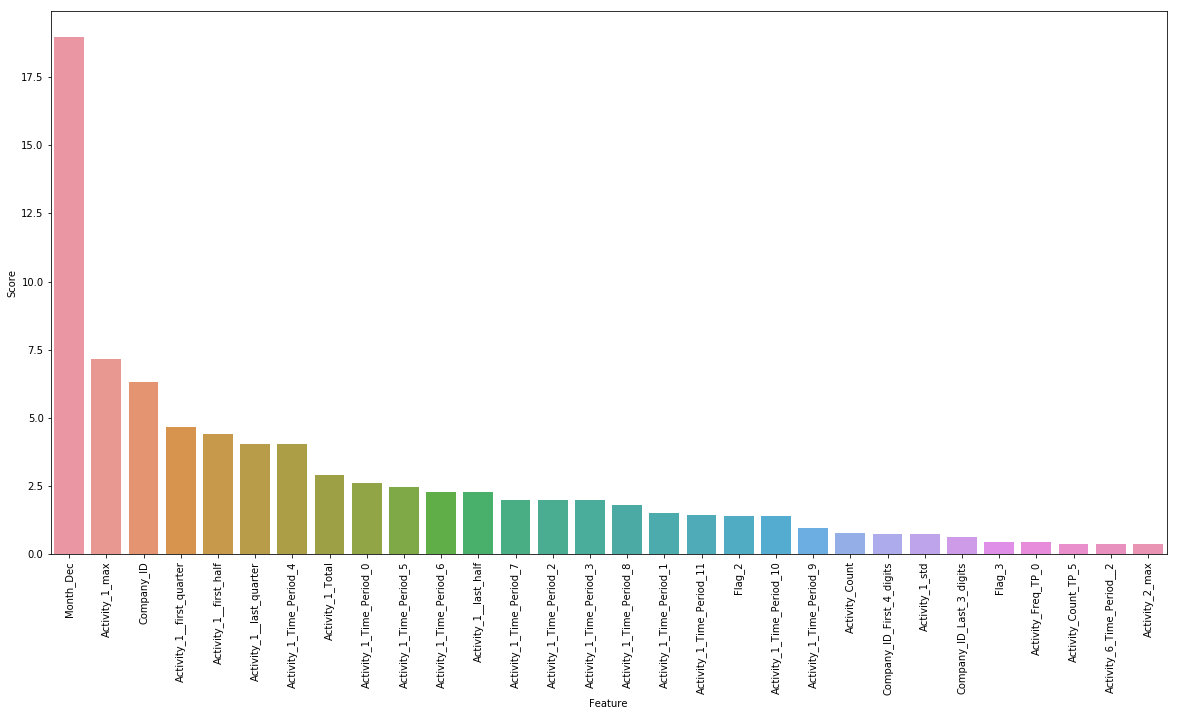

In [41]:
fig, ax = plt.subplots(figsize =(20, 10))
imp=sns.barplot(ax=ax, x='Feature', y='Score', data=feature_imp[0:30])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

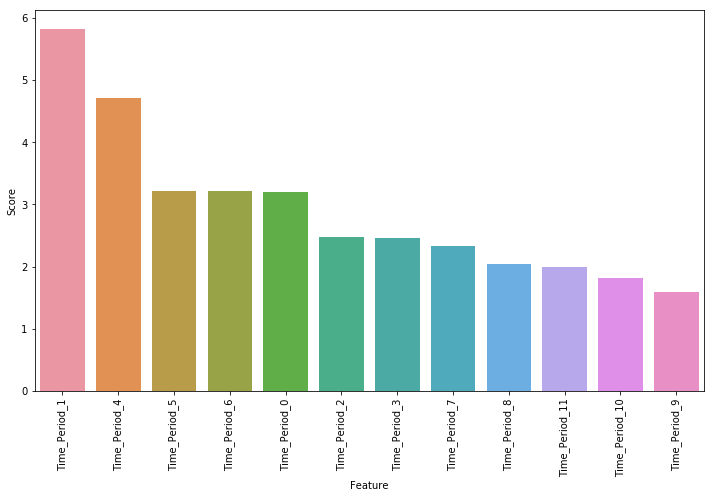

In [298]:
lookup = ['Time_Period_0', 'Time_Period_1', 'Time_Period_2', 'Time_Period_3', 'Time_Period_4', 'Time_Period_5', 'Time_Period_6', 'Time_Period_7',
          'Time_Period_8', 'Time_Period_9', 'Time_Period_10', 'Time_Period_11']

temp = pd.DataFrame(columns=['Feature', 'Score'])
for act in lookup:
    temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum()}, index=[0])])
#     print(act, feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum())

temp.sort_values(by='Score', ascending=False, inplace = True)
fig, ax = plt.subplots(figsize =(12, 7))
imp=sns.barplot(ax=ax, x='Feature', y='Score', data=temp)
plt.xticks(rotation=90)

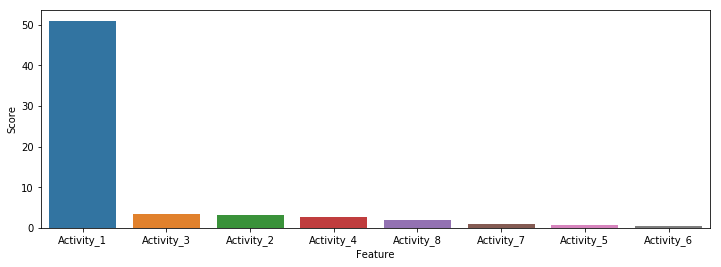

In [42]:
lookup = ['Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5', 'Activity_6', 'Activity_7', 'Activity_8']

temp = pd.DataFrame(columns=['Feature', 'Score'])
for act in lookup:
    temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum()}, index=[0])])
#     print(act, feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum())

temp.sort_values(by='Score', ascending=False, inplace = True)
fig, ax = plt.subplots(figsize =(12, 4))
imp=sns.barplot(ax=ax, x='Feature', y='Score', data=temp)
# plt.xticks(rotation=90)

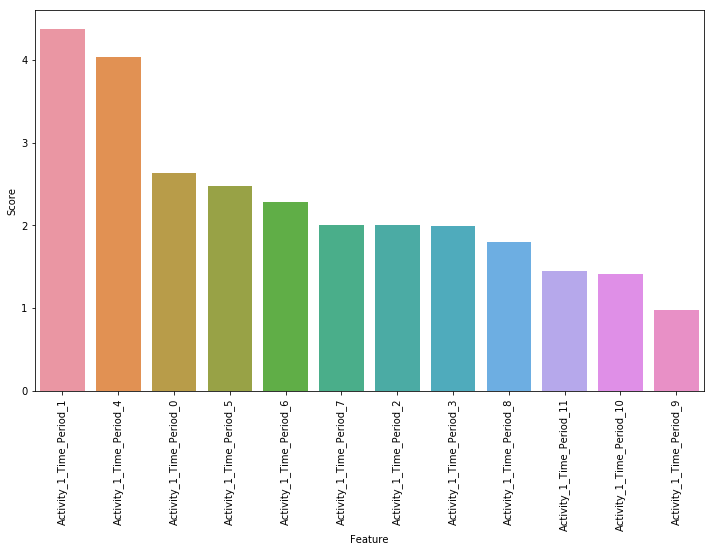

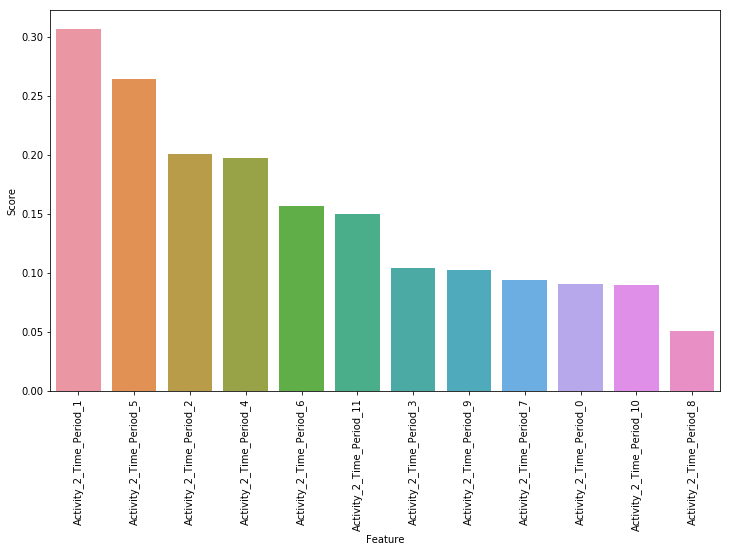

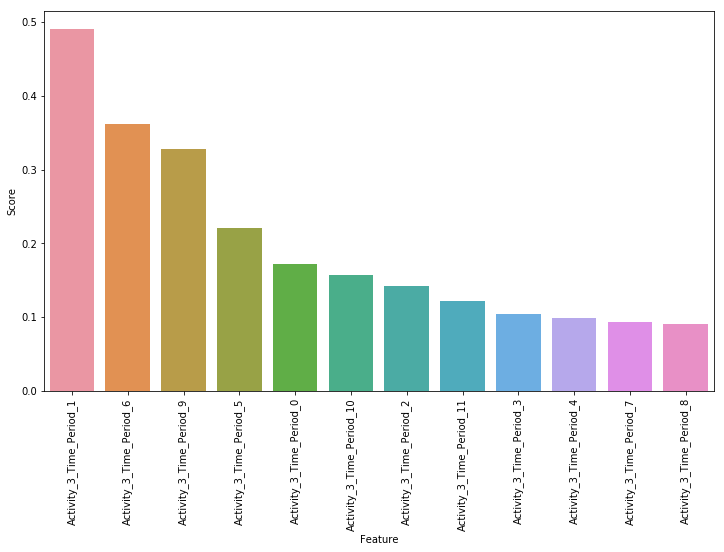

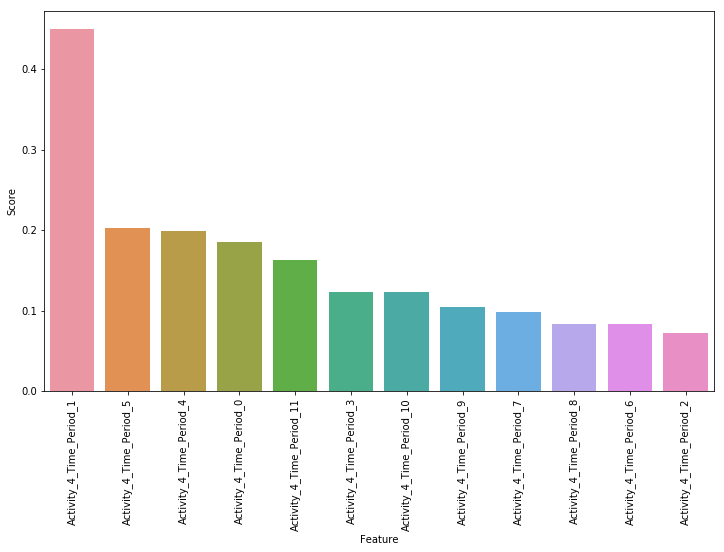

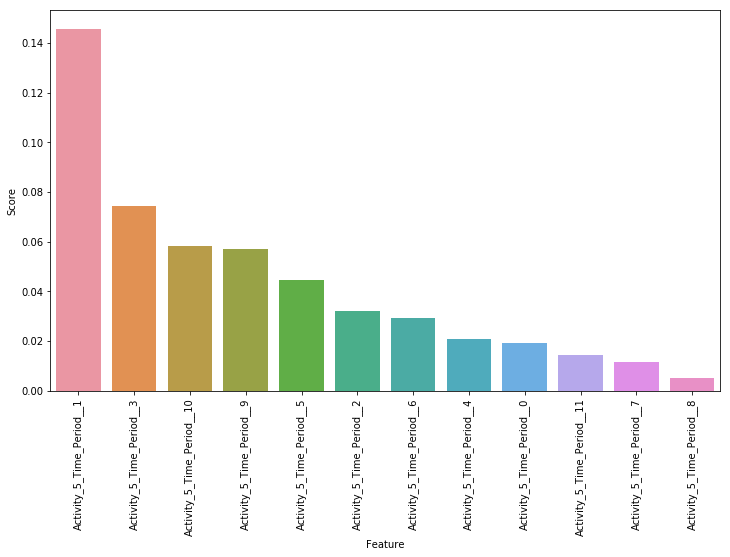

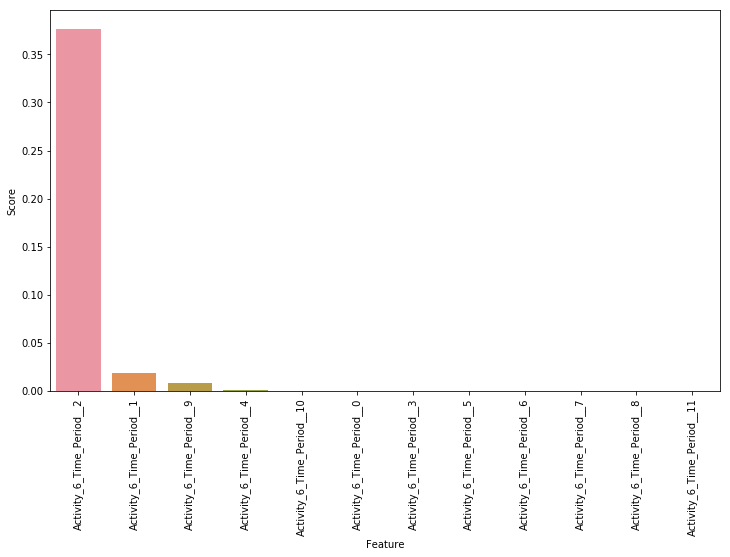

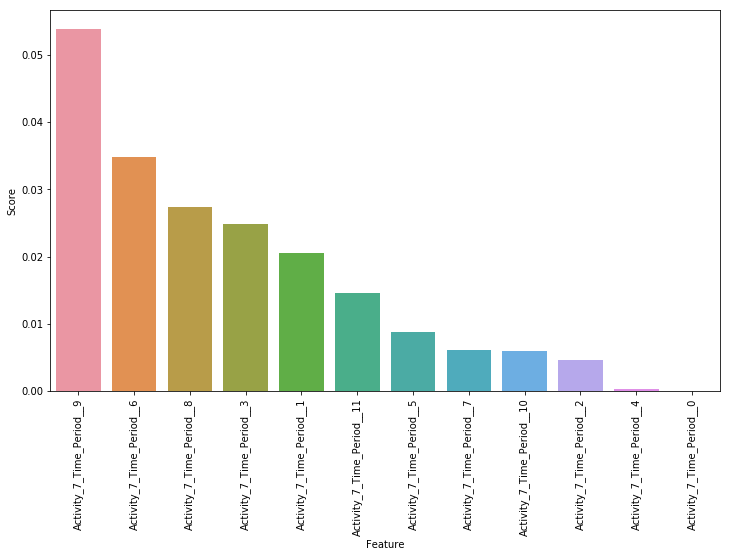

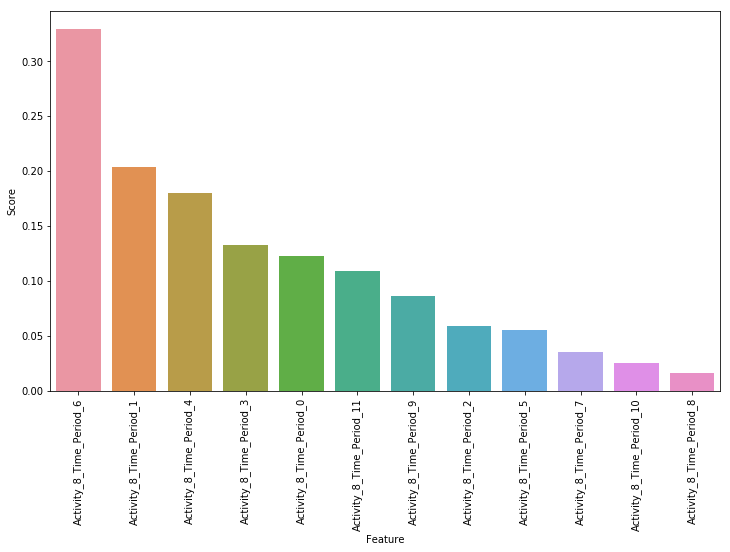

In [43]:
lookup1 = ['Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5', 'Activity_6', 'Activity_7', 'Activity_8']
lookup2 = ['Time_Period_0', 'Time_Period_1', 'Time_Period_2', 'Time_Period_3', 'Time_Period_4', 'Time_Period_5', 'Time_Period_6', 'Time_Period_7',
          'Time_Period_8', 'Time_Period_9', 'Time_Period_10', 'Time_Period_11']

for l1 in lookup1:
    temp = pd.DataFrame(columns=['Feature', 'Score'])
    for act in lookup2:
        if l1 == 'Activity_5'or l1 == 'Activity_6' or l1 == 'Activity_7':
            act = l1+'_'+act[0:11]+'_'+act[11:]
        else:
            act = l1+"_"+act
        temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum()}, index=[0])])
#         print(act, feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum())

    temp.sort_values(by='Score', ascending=False, inplace = True)
    fig, ax = plt.subplots(figsize =(12, 7))
    imp=sns.barplot(ax=ax, x='Feature', y='Score', data=temp)
#     plt.pie([np.round(s) for s in temp.Score], [l for l in temp.Feature])
    plt.xticks(rotation=90)

Text(0.5, 1.0, 'Feature Importance')

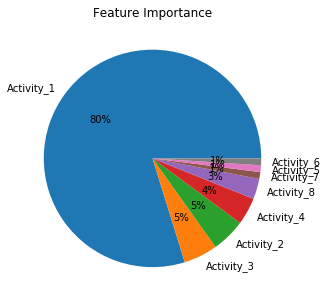

In [44]:
lookup = ['Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5', 'Activity_6', 'Activity_7', 'Activity_8']

temp = pd.DataFrame(columns=['Feature', 'Score'])
for act in lookup:
    temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum()}, index=[0])])
#     print(act, feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum())

temp.sort_values(by='Score', ascending=False, inplace = True)
a = np.round(temp.Score*100/temp['Score'].sum()).values
b = temp['Feature'].values
fig, ax = plt.subplots(figsize =(10, 5))
imp=plt.pie(a, labels=b, autopct='%.0f%%')
plt.title("Feature Importance")

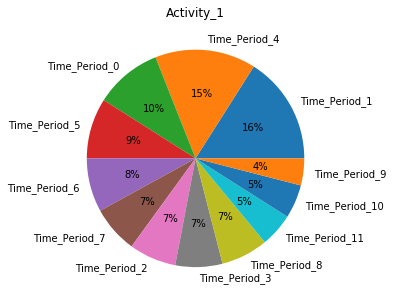

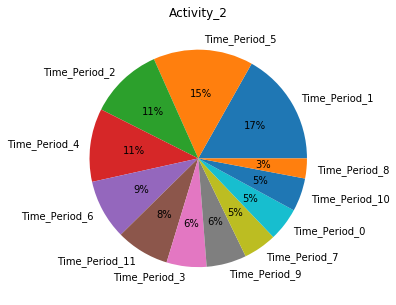

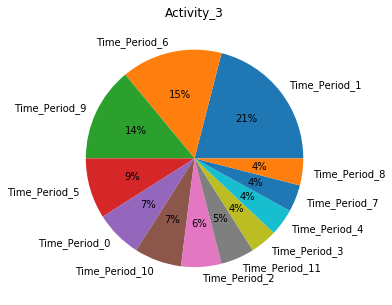

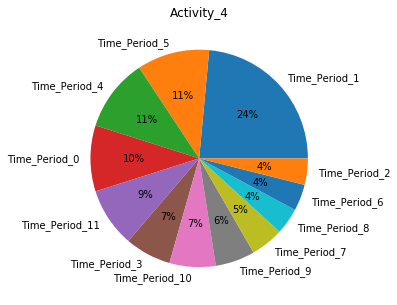

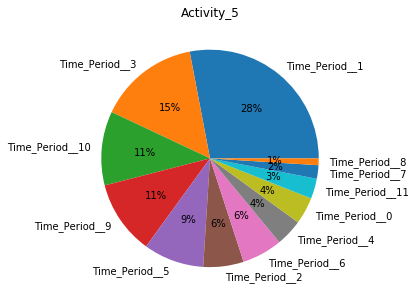

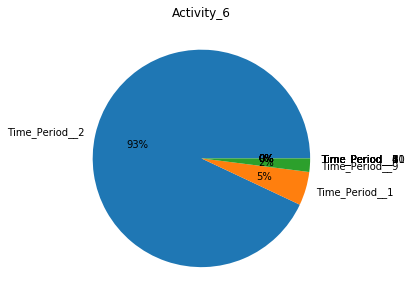

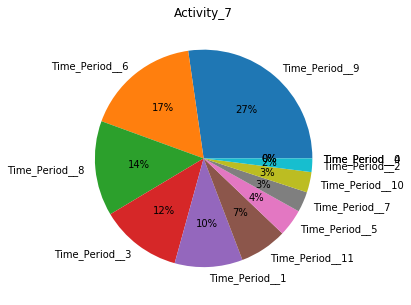

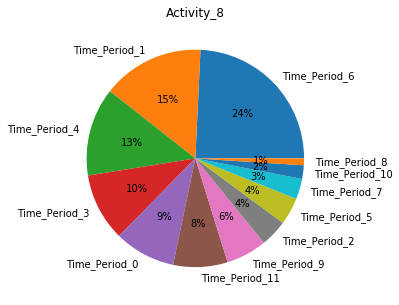

In [45]:
lookup1 = ['Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5', 'Activity_6', 'Activity_7', 'Activity_8']
lookup2 = ['Time_Period_0', 'Time_Period_1', 'Time_Period_2', 'Time_Period_3', 'Time_Period_4', 'Time_Period_5', 'Time_Period_6', 'Time_Period_7',
          'Time_Period_8', 'Time_Period_9', 'Time_Period_10', 'Time_Period_11']

for l1 in lookup1:
    temp = pd.DataFrame(columns=['Feature', 'Score'])
    for act in lookup2:
        if l1 == 'Activity_5'or l1 == 'Activity_6' or l1 == 'Activity_7':
            act = l1+'_'+act[0:11]+'_'+act[11:]
        else:
            act = l1+"_"+act
        temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum()}, index=[0])])
#         print(act, feature_imp[feature_imp.Feature.apply(lambda x: act in x)]['Score'].sum())

    temp.sort_values(by='Score', ascending=False, inplace = True)
    a = np.round(temp.Score*100/temp['Score'].sum()).values
    b = temp['Feature'].apply(lambda x: x[11:]).values
    fig, ax = plt.subplots(figsize =(10, 5))
    imp=plt.pie(a, labels=b, autopct='%.0f%%')
    plt.title(l1)
#     plt.pie([np.round(s) for s in temp.Score], [l for l in temp.Feature])
#     plt.xticks(rotation=90)

Text(0.5, 1.0, 'Activity Frequency of retaining clients')

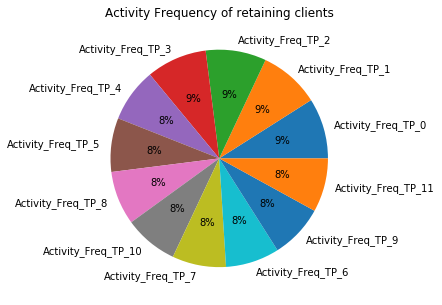

In [46]:
lookup = ['Activity_Freq_TP_0', 'Activity_Freq_TP_1', 'Activity_Freq_TP_2', 'Activity_Freq_TP_3', 'Activity_Freq_TP_4', 'Activity_Freq_TP_5',
          'Activity_Freq_TP_6', 'Activity_Freq_TP_7', 'Activity_Freq_TP_8', 'Activity_Freq_TP_9', 'Activity_Freq_TP_10', 'Activity_Freq_TP_11']

temp = pd.DataFrame(columns=['Feature', 'Score'])
for act in lookup:
    temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': train_df[train_df['Client_Retention_Flag']=='Yes'][act].sum()}, index=[0])])
#     print(act, train_df[act].sum())

temp.sort_values(by='Score', ascending=False, inplace = True)
a = [np.round(x) for x in (temp.Score*100/temp['Score'].sum()).values]
b = temp['Feature'].values
fig, ax = plt.subplots(figsize =(10, 5))
imp=plt.pie(a, labels=b, autopct='%.0f%%')
plt.title("Activity Frequency of retaining clients")

Text(0.5, 1.0, 'Activity Frequency of non-retaining clients')

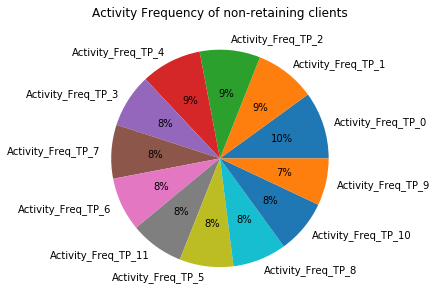

In [47]:
lookup = ['Activity_Freq_TP_0', 'Activity_Freq_TP_1', 'Activity_Freq_TP_2', 'Activity_Freq_TP_3', 'Activity_Freq_TP_4', 'Activity_Freq_TP_5',
          'Activity_Freq_TP_6', 'Activity_Freq_TP_7', 'Activity_Freq_TP_8', 'Activity_Freq_TP_9', 'Activity_Freq_TP_10', 'Activity_Freq_TP_11']

temp = pd.DataFrame(columns=['Feature', 'Score'])
for act in lookup:
    temp = pd.concat([temp, pd.DataFrame({'Feature': act, 'Score': train_df[train_df['Client_Retention_Flag']=='No'][act].sum()}, index=[0])])
#     print(act, train_df[act].sum())

temp.sort_values(by='Score', ascending=False, inplace = True)
a = [np.round(x) for x in (temp.Score*100/temp['Score'].sum()).values]
b = temp['Feature'].values
fig, ax = plt.subplots(figsize =(10, 5))
imp=plt.pie(a, labels=b, autopct='%.0f%%')
plt.title("Activity Frequency of non-retaining clients")

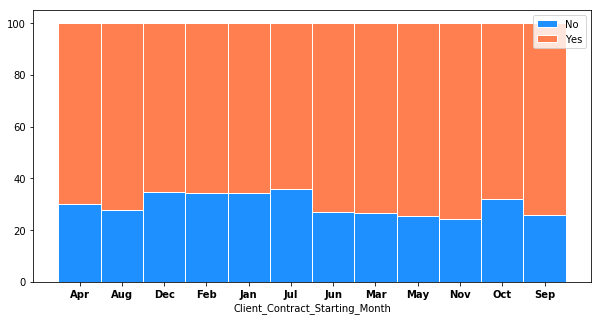

In [49]:
temp = pd.read_csv('Challenge Data/Train.csv')
temp.columns = temp.columns.str.strip().str.replace(' ', '_')
temp = pd.crosstab(temp.Client_Contract_Starting_Month, temp.Client_Retention_Flag).apply(lambda r: r*100/r.sum(), axis=1).reset_index()
plt.figure(figsize=(10, 5))

temp1 = temp[['Client_Contract_Starting_Month', 'Yes']]
temp2 = temp[['Client_Contract_Starting_Month', 'No']]

bars1 = temp.No.tolist()
bars2 = temp.Yes.tolist()
bars = np.add(bars1, bars2).tolist()
names = temp.Client_Contract_Starting_Month.tolist()
Retention = ['No', 'Yes']
r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
barWidth=1

plt.bar(r, bars1, color='dodgerblue', edgecolor='white', width=barWidth)
plt.bar(r, bars2, bottom=bars1, color='coral', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.xlabel("Client_Contract_Starting_Month")
plt.legend(Retention)

# sns.barplot(ax=ax, x="Client_Contract_Starting_Month", y="Yes", data=temp1, color='coral', label="Yes", order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# sns.barplot(ax=ax, x="Client_Contract_Starting_Month", y="No", data=temp2, bottom=temp1, color='dodgerblue', label="No", order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# ax.legend()
# ax.set_ylabel('Percentage')

Text(0.5, 1.0, 'Document Usage - Retained vs Non Retained')

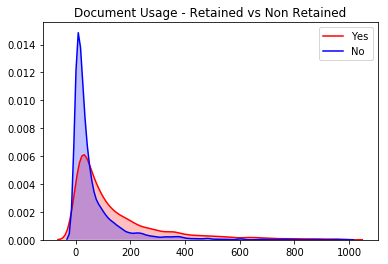

In [51]:
train_df_1 = train_df[train_df['Activity_1_Total']<1000]

sns.kdeplot(train_df_1.loc[(train_df_1['Client_Retention_Flag']=='Yes'), 
            'Activity_1_Total'], color='r', shade=True, Label='Yes') 
  
sns.kdeplot(train_df_1.loc[(train_df_1['Client_Retention_Flag']=='No'), 
            'Activity_1_Total'], color='b', shade=True, Label='No') 
plt.title('Document Usage - Retained vs Non Retained')  